# **Phishing URL Detection**

### **Objective : Feature Extraction, EDA and training Machine Learning models**

In [1]:
import pandas as pd

# Loading the downloaded dataset
df = pd.read_csv("urldata.csv")
df.head(10)

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
5,5,https://www.reddit.com,benign,0
6,6,https://www.yahoo.com,benign,0
7,7,https://www.google.co.in,benign,0
8,8,https://www.qq.com,benign,0
9,9,https://www.amazon.com,benign,0


In [2]:
#Removing the unnamed columns as it is not necesary.
df = df.drop('Unnamed: 0',axis=1)
df.head(10)

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0
5,https://www.reddit.com,benign,0
6,https://www.yahoo.com,benign,0
7,https://www.google.co.in,benign,0
8,https://www.qq.com,benign,0
9,https://www.amazon.com,benign,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [4]:
df.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [5]:
df.shape

(450176, 3)

In [6]:
# Printing number of legit and fraud domain urls
df["label"].value_counts()

label
benign       345738
malicious    104438
Name: count, dtype: int64

In [7]:
from urllib.parse import urlparse

# Function to validate a URL
def is_valid_url(url):
    try:
        result = urlparse(url)
        return all([result.scheme, result.netloc])  # A valid URL must have a scheme and netloc
    except Exception:
        return False

# Filter out rows with invalid URLs
valid_urls_df = df[df['url'].apply(is_valid_url)].reset_index(drop=True)

print(f"Number of rows after dropping invalid URLs: {len(valid_urls_df)}")


Number of rows after dropping invalid URLs: 450172


# **Feature Extraction**

A total of 18 features will be derived for each URL in the dataset.

The extracted features are grouped into the following categories:
1. Length-Based Features (4n)
2. Count-Based Features (12n)
3. Binary Features (2n)

### **Length-Based Features**

The following features will be extracted from the URL for classification.
- Length Of Url
- Length of Hostname
- Length Of Path
- Length Of First Directory

In [8]:
urldata = valid_urls_df.copy()

urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))


In [9]:
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [10]:
urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length
0,https://www.google.com,benign,0,22,14,0,0
1,https://www.youtube.com,benign,0,23,15,0,0
2,https://www.facebook.com,benign,0,24,16,0,0
3,https://www.baidu.com,benign,0,21,13,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,0
5,https://www.reddit.com,benign,0,22,14,0,0
6,https://www.yahoo.com,benign,0,21,13,0,0
7,https://www.google.co.in,benign,0,24,16,0,0
8,https://www.qq.com,benign,0,18,10,0,0
9,https://www.amazon.com,benign,0,22,14,0,0


### **Count-Based Features**

The following features will be extracted from the URL for classification.
- Count Of '-'
- Count Of '@'
- Count Of '?'
- Count Of '%'
- Count Of '.'
- Count Of '='
- Count Of 'http'
- Count Of 'https'
- Count Of 'www'
- Count Of Digits
- Count Of Letters
- Count Of Number Of Directories

In [11]:
# Count occurrences of different special characters in the URL

urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

# Count 'http' explicitly (count only 'http' and not 'https')
urldata['count-http'] = urldata['url'].apply(lambda i: i.count('http') - i.count('https'))

# Count 'https' explicitly (only count 'https')
urldata['count-https'] = urldata['url'].apply(lambda i: i.count('https'))


In [12]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [13]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [14]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [15]:
# printing first few rows
urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-www,count-http,count-https,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,0,2,0,1,0,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,0,2,0,1,0,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,0,2,0,1,0,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,0,2,0,1,0,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,0,2,0,1,0,1,0,20,0
5,https://www.reddit.com,benign,0,22,14,0,0,0,0,0,0,2,0,1,0,1,0,17,0
6,https://www.yahoo.com,benign,0,21,13,0,0,0,0,0,0,2,0,1,0,1,0,16,0
7,https://www.google.co.in,benign,0,24,16,0,0,0,0,0,0,3,0,1,0,1,0,18,0
8,https://www.qq.com,benign,0,18,10,0,0,0,0,0,0,2,0,1,0,1,0,13,0
9,https://www.amazon.com,benign,0,22,14,0,0,0,0,0,0,2,0,1,0,1,0,17,0


### **Binary Features**

The following features will be extracted from the URL for classification.
- Use of IP or not
- Use of Shortening URL or not

#### **IP Address in the URL**

Detects if the URL contains an IP address, which may indicate a phishing attempt to steal personal information.

In [16]:
import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

#### **Using URL Shortening Services**

URL shortening reduces the length of a URL while still directing to the intended webpage using an HTTP redirect on a short domain.

In [17]:
import re

# Function to detect use of URL shortening services
def shortening_service(url):
    match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      r'tr\.im|link\.zip\.net', url)
    if match:
        return -1  # Indicates a shortened URL
    else:
        return 1   # Indicates a non-shortened URL

# Apply the function to the 'url' column
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))


In [18]:
# printing first few rows
urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-www,count-http,count-https,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,0,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,0,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,0,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,0,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,0,1,0,20,0,1,1
5,https://www.reddit.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,0,1,0,17,0,1,-1
6,https://www.yahoo.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,0,1,0,16,0,1,1
7,https://www.google.co.in,benign,0,24,16,0,0,0,0,0,...,3,0,1,0,1,0,18,0,1,1
8,https://www.qq.com,benign,0,18,10,0,0,0,0,0,...,2,0,1,0,1,0,13,0,1,1
9,https://www.amazon.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,0,1,0,17,0,1,1


In [19]:
# printing info about current dataset
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450172 entries, 0 to 450171
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              450172 non-null  object
 1   label            450172 non-null  object
 2   result           450172 non-null  int64 
 3   url_length       450172 non-null  int64 
 4   hostname_length  450172 non-null  int64 
 5   path_length      450172 non-null  int64 
 6   fd_length        450172 non-null  int64 
 7   count-           450172 non-null  int64 
 8   count@           450172 non-null  int64 
 9   count?           450172 non-null  int64 
 10  count%           450172 non-null  int64 
 11  count.           450172 non-null  int64 
 12  count=           450172 non-null  int64 
 13  count-www        450172 non-null  int64 
 14  count-http       450172 non-null  int64 
 15  count-https      450172 non-null  int64 
 16  count-digits     450172 non-null  int64 
 17  count-lett

In [20]:
urldata.isnull().sum()

url                0
label              0
result             0
url_length         0
hostname_length    0
path_length        0
fd_length          0
count-             0
count@             0
count?             0
count%             0
count.             0
count=             0
count-www          0
count-http         0
count-https        0
count-digits       0
count-letters      0
count_dir          0
use_of_ip          0
short_url          0
dtype: int64

In [21]:
#saving dataset to csv
urldata.to_csv("Url_Processed (from code).csv")

# **Exploratory Data Analysis**

In [22]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-www,count-http,count-https,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,0,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,0,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,0,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,0,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,0,1,0,20,0,1,1
5,https://www.reddit.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,0,1,0,17,0,1,-1
6,https://www.yahoo.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,0,1,0,16,0,1,1
7,https://www.google.co.in,benign,0,24,16,0,0,0,0,0,...,3,0,1,0,1,0,18,0,1,1
8,https://www.qq.com,benign,0,18,10,0,0,0,0,0,...,2,0,1,0,1,0,13,0,1,1
9,https://www.amazon.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,0,1,0,17,0,1,1


In [24]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450172 entries, 0 to 450171
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              450172 non-null  object
 1   label            450172 non-null  object
 2   result           450172 non-null  int64 
 3   url_length       450172 non-null  int64 
 4   hostname_length  450172 non-null  int64 
 5   path_length      450172 non-null  int64 
 6   fd_length        450172 non-null  int64 
 7   count-           450172 non-null  int64 
 8   count@           450172 non-null  int64 
 9   count?           450172 non-null  int64 
 10  count%           450172 non-null  int64 
 11  count.           450172 non-null  int64 
 12  count=           450172 non-null  int64 
 13  count-www        450172 non-null  int64 
 14  count-http       450172 non-null  int64 
 15  count-https      450172 non-null  int64 
 16  count-digits     450172 non-null  int64 
 17  count-lett

label
benign       345738
malicious    104434
Name: count, dtype: int64


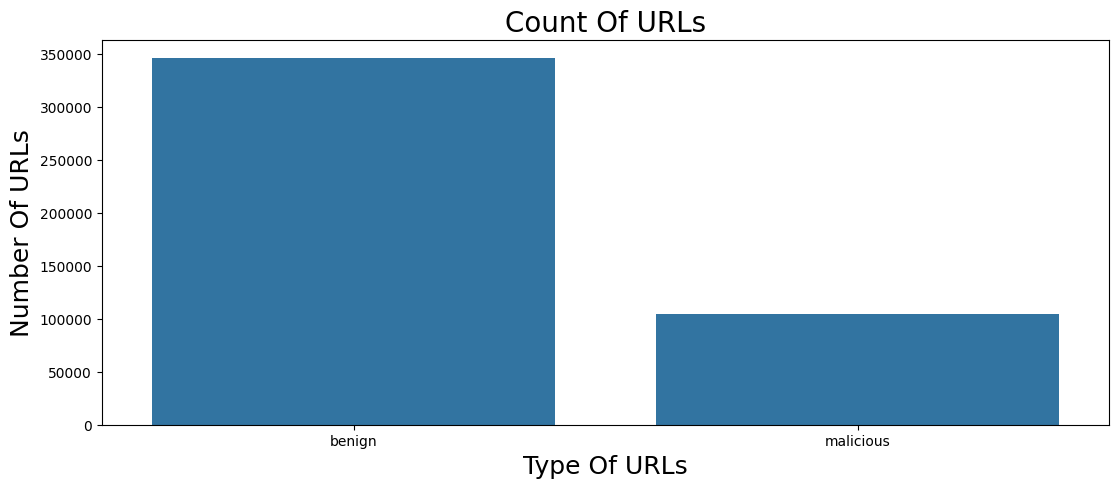

In [25]:
i = urldata["label"].value_counts()
print(i)

plt.figure(figsize=(13,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

<Axes: >

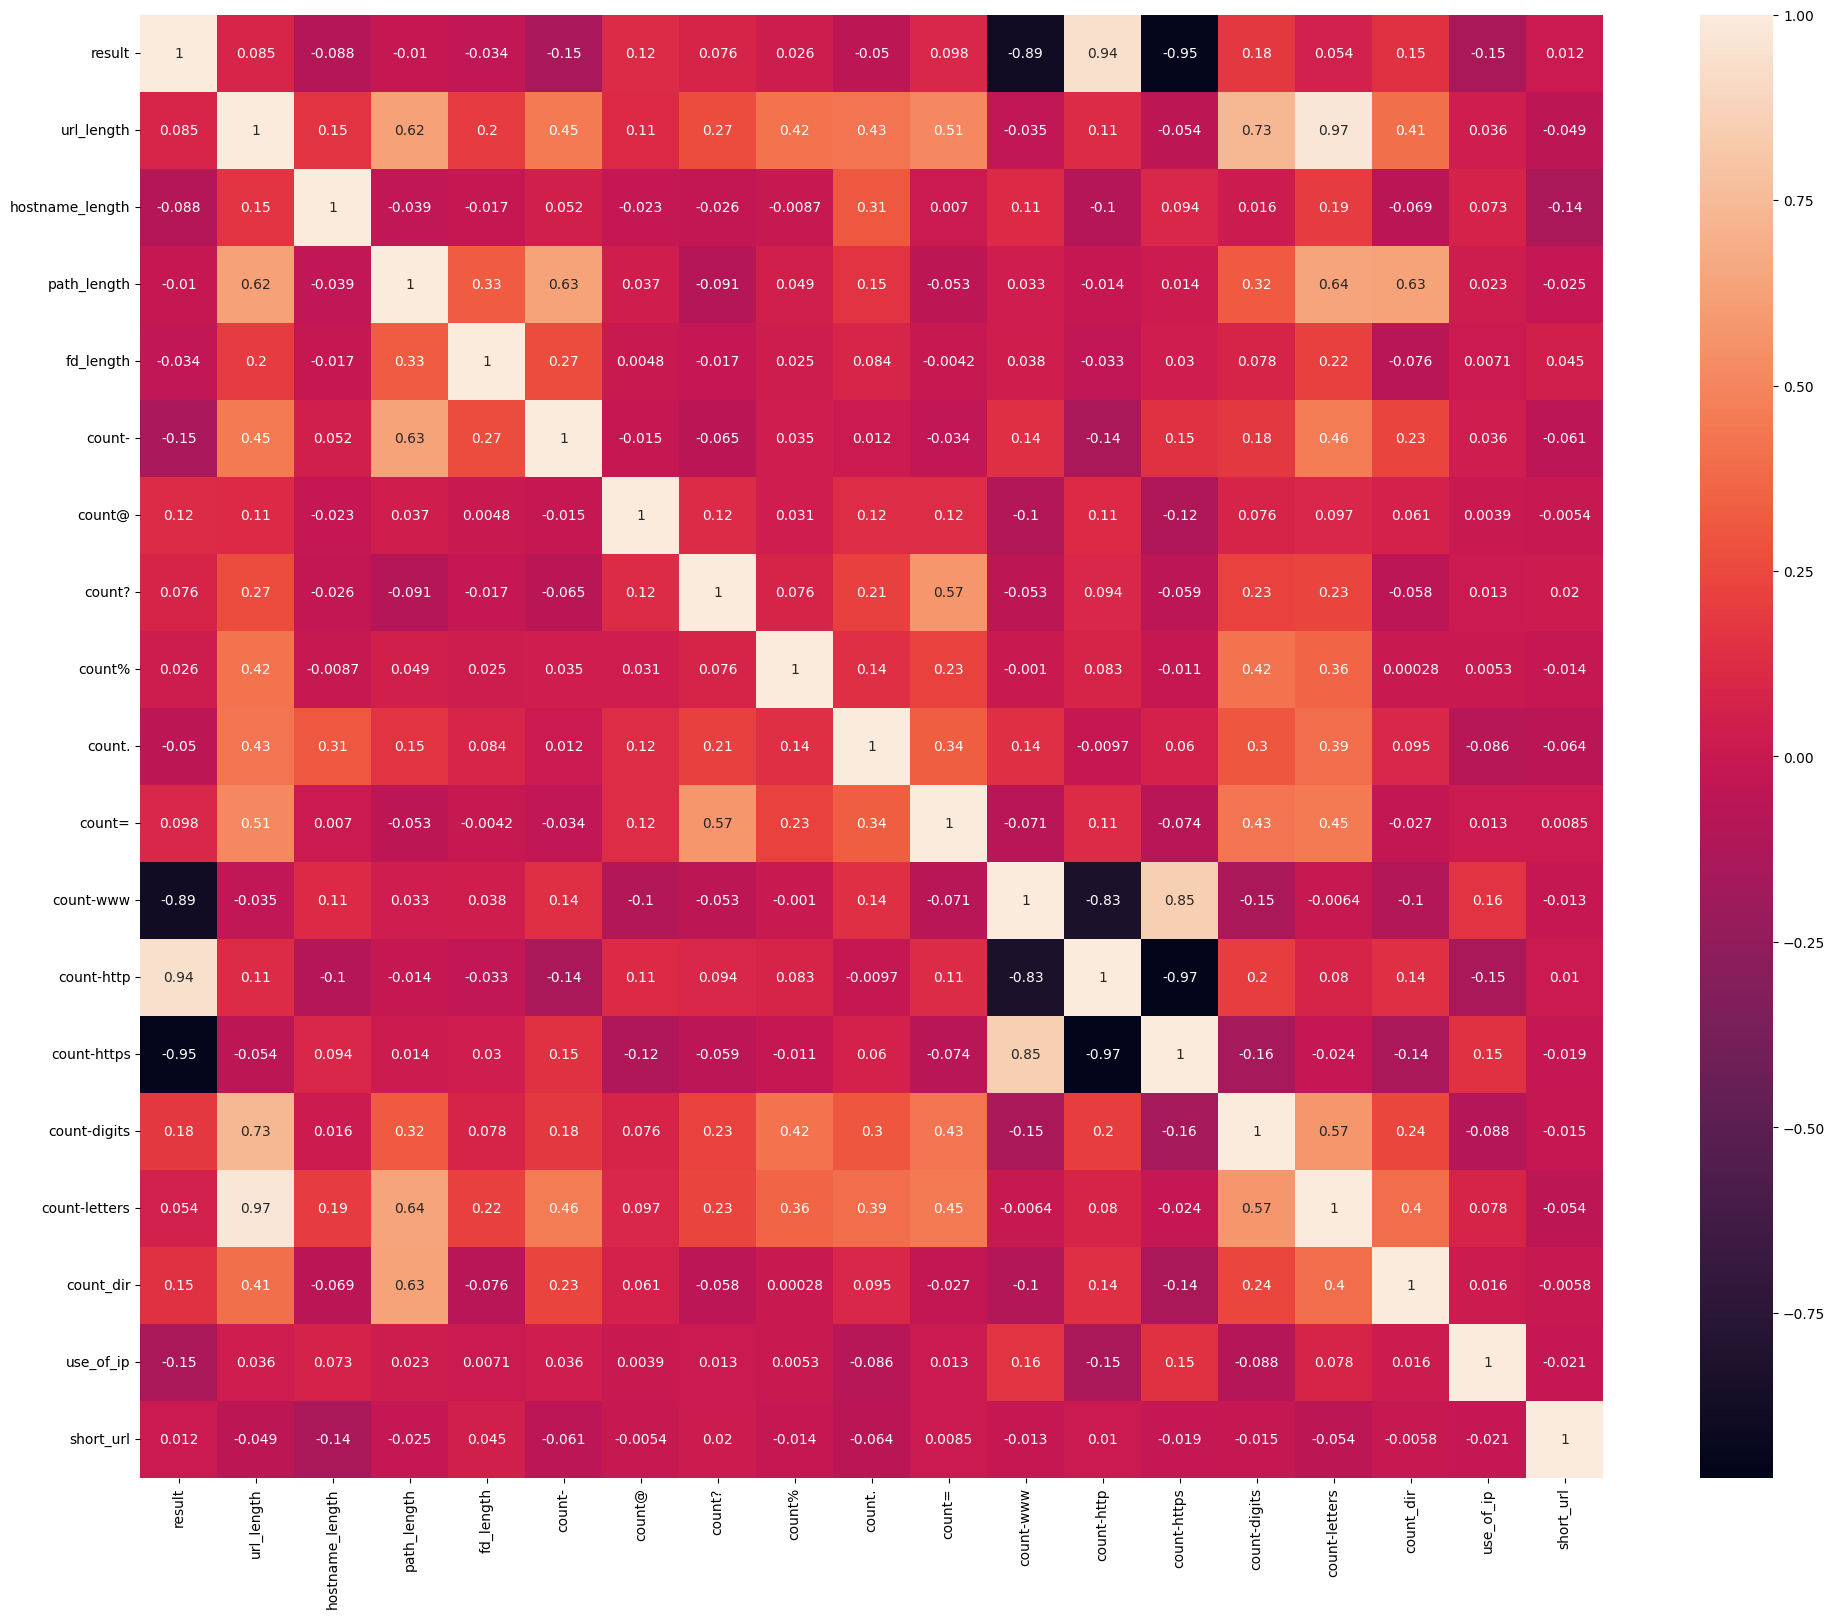

In [26]:
#Correlation Heatmap
corrmat = urldata.drop(urldata.columns[:2], axis=1).corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

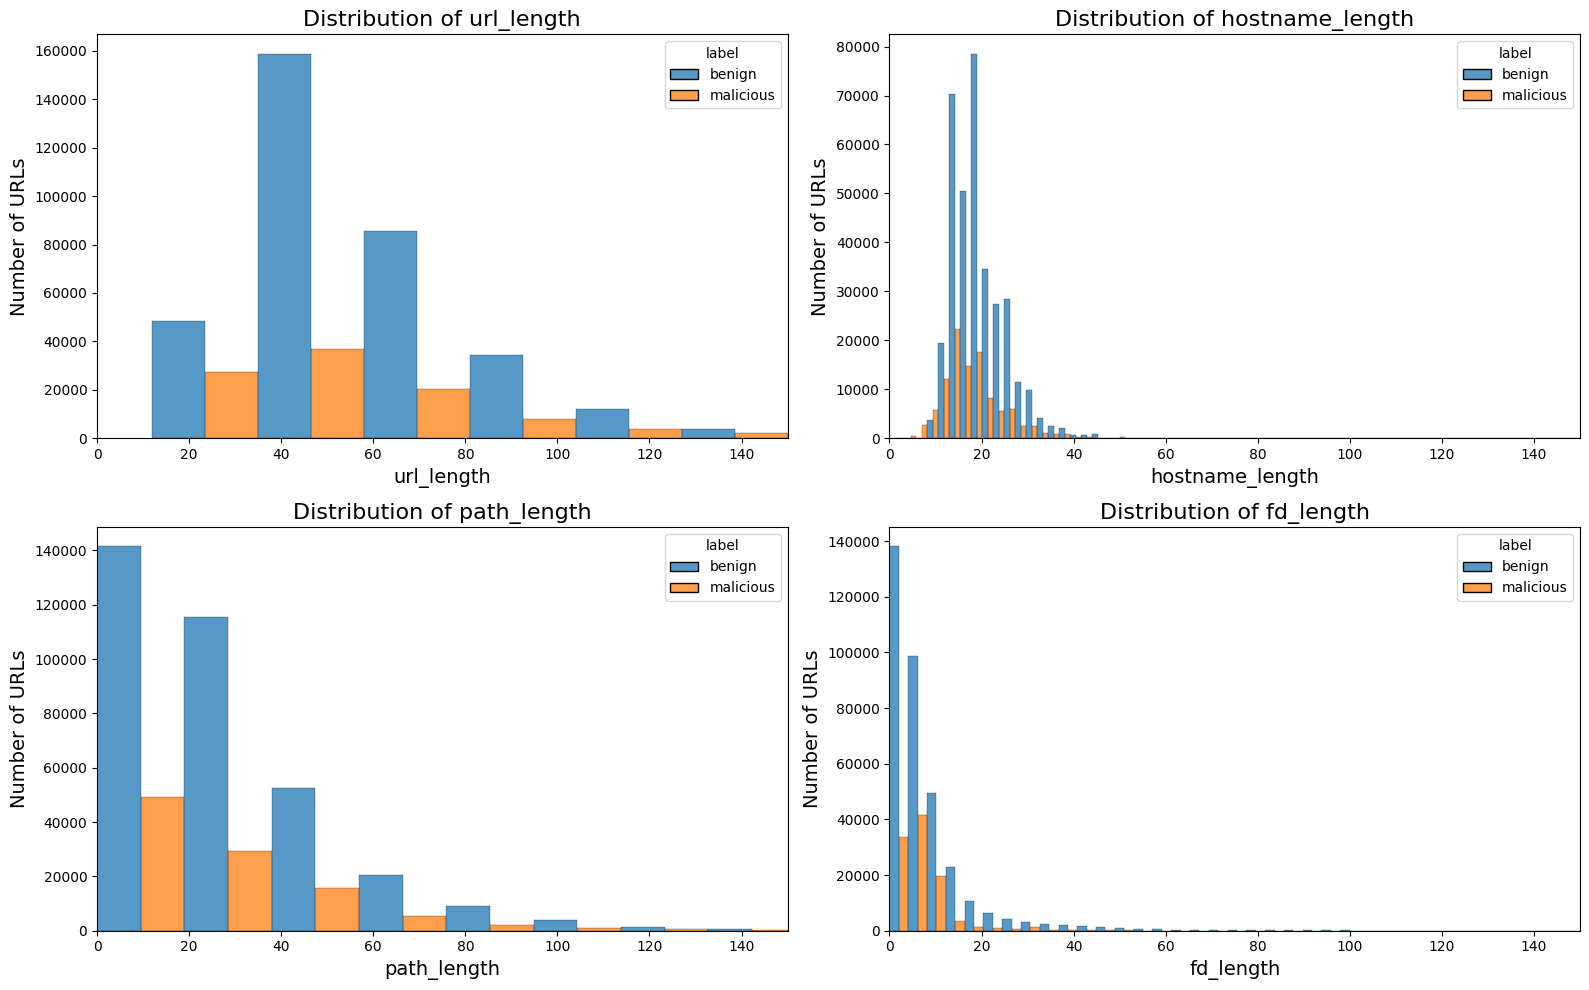

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data preparation
hist_features = ["url_length", "hostname_length", "path_length", "fd_length"]

# Setting the figure size based on the number of plots
num_features = len(hist_features)
cols = 2  # Number of columns in the grid
rows = (num_features + 1) // cols  # Number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))  # Dynamic sizing

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each feature and plot
for idx, feature in enumerate(hist_features):
    sns.histplot(data=urldata, x=feature, bins=100, hue='label', multiple="dodge", ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature}", fontsize=16)
    axes[idx].set_xlabel(feature, fontsize=14)
    axes[idx].set_ylabel("Number of URLs", fontsize=14)
    axes[idx].set_xlim(0, 150)

# Hide unused subplots (if any)
for idx in range(len(hist_features), len(axes)):
    axes[idx].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


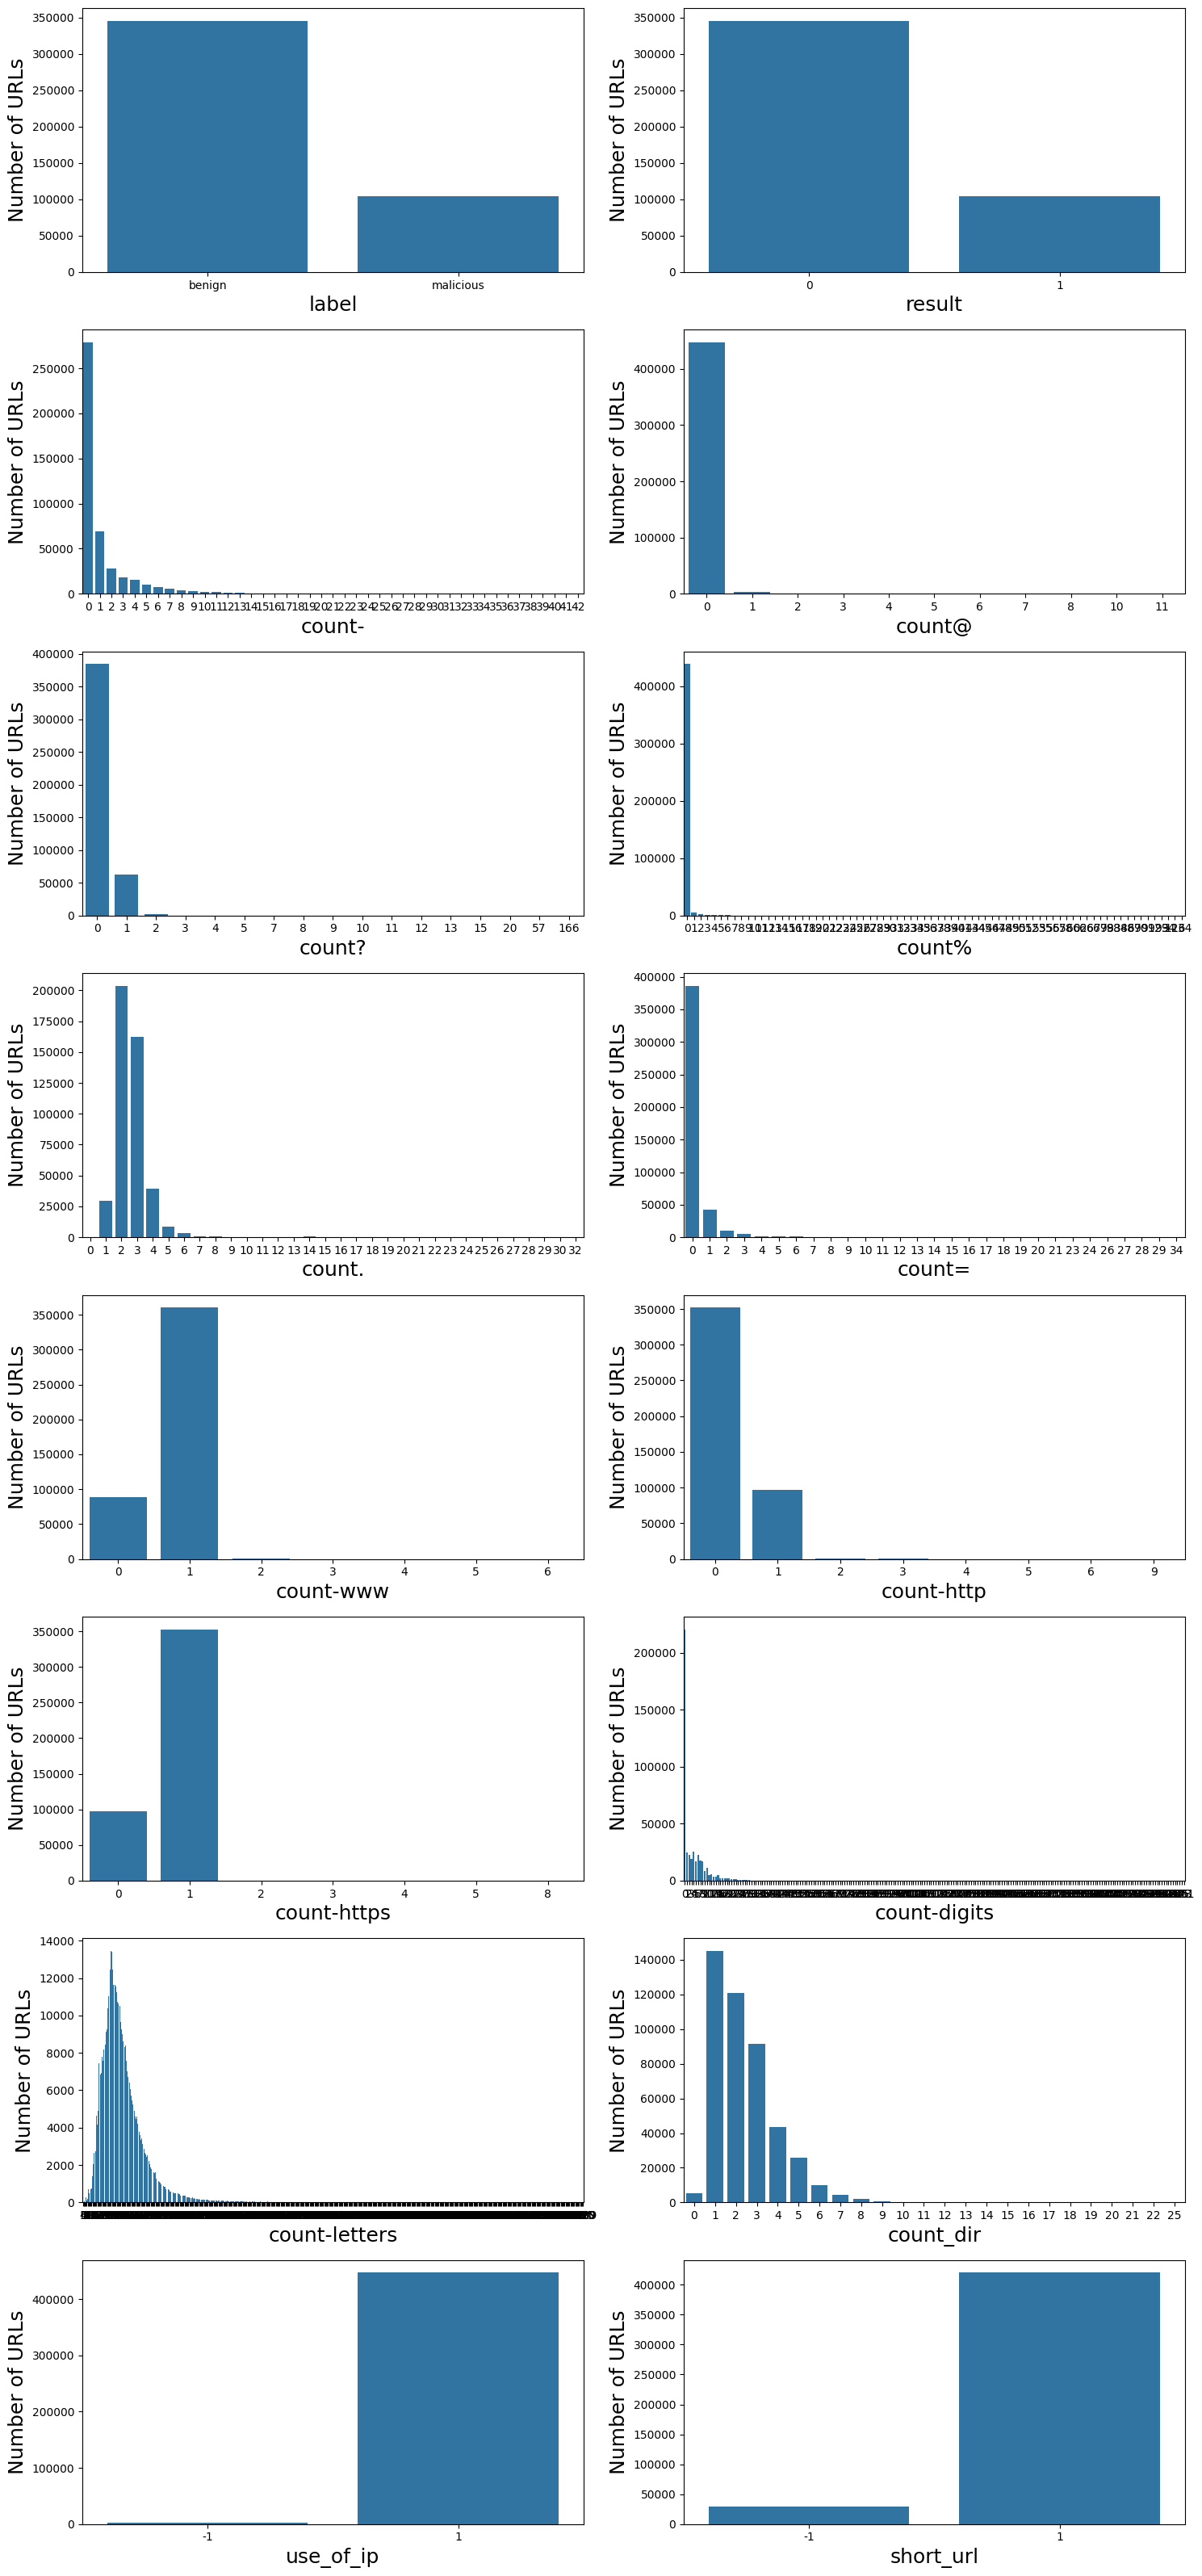

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Features list excluding "url"
features = list(urldata.columns)
features.remove("url")

# Set plot size for each subplot
rcParams['figure.figsize'] = 15, 4

# Exclude features in hist_features (already handled separately)
hist_features = ["url_length", "hostname_length", "path_length", "fd_length"]
features = [feature for feature in features if feature not in hist_features]

# Number of rows and columns for the grid layout
num_features = len(features)
cols = 2  # You can adjust the number of columns based on the number of features

# Calculate the number of rows needed to display all plots
rows = (num_features // cols) + (num_features % cols > 0)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through features and plot
for idx, feature in enumerate(features):
    sns.countplot(x=feature, data=urldata, ax=axes[idx])
    axes[idx].set_xlabel(feature, fontsize=18)
    axes[idx].set_ylabel("Number of URLs", fontsize=18)

# Remove any unused subplots
for idx in range(num_features, len(axes)):
    fig.delaxes(axes[idx])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


# **Model Training**

In [29]:
urldata.head()


,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-www,count-http,count-https,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,0,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,0,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,0,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,0,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,0,1,0,20,0,1,1


In [30]:
# remove uneccessary columns
urldata_duplicate=urldata.copy()
urldata.drop(["url","label"],axis=1,inplace=True)

In [31]:
urldata.head()

,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-www,count-http,count-https,count-digits,count-letters,count_dir,use_of_ip,short_url
0,0,22,14,0,0,0,0,0,0,2,0,1,0,1,0,17,0,1,1
1,0,23,15,0,0,0,0,0,0,2,0,1,0,1,0,18,0,1,1
2,0,24,16,0,0,0,0,0,0,2,0,1,0,1,0,19,0,1,1
3,0,21,13,0,0,0,0,0,0,2,0,1,0,1,0,16,0,1,1
4,0,25,17,0,0,0,0,0,0,2,0,1,0,1,0,20,0,1,1


In [32]:
#Independent Variables
x = urldata.iloc[:, 1:]

#Dependent Variable
y = urldata.iloc[:, 0]

In [33]:
# printing x
x.head()
     

,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-www,count-http,count-https,count-digits,count-letters,count_dir,use_of_ip,short_url
0,22,14,0,0,0,0,0,0,2,0,1,0,1,0,17,0,1,1
1,23,15,0,0,0,0,0,0,2,0,1,0,1,0,18,0,1,1
2,24,16,0,0,0,0,0,0,2,0,1,0,1,0,19,0,1,1
3,21,13,0,0,0,0,0,0,2,0,1,0,1,0,16,0,1,1
4,25,17,0,0,0,0,0,0,2,0,1,0,1,0,20,0,1,1


In [34]:
# printing y
y.head()
     

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

#### **Using SMOTE to tackle Class Imbalance**

In [35]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

# Convert the resampled data back to DataFrame
x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)


In [36]:
# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (691476, 18)
Size of y-sample : (691476, 1)


#### **Train-Test Splitting**

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 18)
Shape of x_valid:  (138296, 18)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


#### **Feature Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform on training data, and transform on test data
x_train_scaled = scaler.fit_transform(x_train)  # Fit on training data and scale
x_test_scaled = scaler.transform(x_test)        # Transform test data based on training set scaling


#### **Training Logistic Regression Model**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


lr = LogisticRegression(random_state=42)
lr.fit(x_train_scaled, y_train.values.ravel()) 
accuracy = lr.score(x_test_scaled, y_test.values.ravel())  

# Make predictions on the scaled test data
y_pred_lr = lr.predict(x_test_scaled)

print("Logistic Regression Metrics:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Train Accuracy: {accuracy_score(y_train, lr.predict(x_train_scaled))}\n")
print(classification_report(y_test, y_pred_lr,digits=5))




Logistic Regression Metrics:
[[69021   159]
 [  287 68829]]

Test Accuracy: 0.9967750332619888
Train Accuracy: 0.9968418959470696

              precision    recall  f1-score   support

           0    0.99586   0.99770   0.99678     69180
           1    0.99770   0.99585   0.99677     69116

    accuracy                        0.99678    138296
   macro avg    0.99678   0.99677   0.99678    138296
weighted avg    0.99678   0.99678   0.99678    138296



#### **Training KNN Model**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, random_state=42)  
knn.fit(x_train_scaled, y_train.values.ravel())

# Predict on the test set
y_pred_knn = knn.predict(x_test_scaled)

# Print metrics
print("KNN Metrics:")
print(confusion_matrix(y_test, y_pred_knn))
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(x_train_scaled))}\n")
print(classification_report(y_test, y_pred_knn,digits=5))

KNN Metrics:
[[69063   117]
 [  234 68882]]

Test Accuracy: 0.9974619656389194
Train Accuracy: 0.9978632633139304

              precision    recall  f1-score   support

           0    0.99662   0.99831   0.99747     69180
           1    0.99830   0.99661   0.99746     69116

    accuracy                        0.99746    138296
   macro avg    0.99746   0.99746   0.99746    138296
weighted avg    0.99746   0.99746   0.99746    138296



#### **Training SVM Model**

In [41]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train_scaled, y_train.values.ravel())  # Ensure y_train is a 1D array

y_pred_svm = svm.predict(x_test_scaled)  # Ensure x_test is also scaled

# Print SVM metrics
print("SVM Metrics:")
print(confusion_matrix(y_test.values.ravel(), y_pred_svm))  # Ensure y_test is a 1D array
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Train Accuracy: {accuracy_score(y_train,svm.predict(x_train_scaled))}\n")
print(classification_report(y_test.values.ravel(), y_pred_svm,digits=5))


SVM Metrics:
[[69033   147]
 [  300 68816]]

Test Accuracy: 0.9967678023948632
Train Accuracy: 0.9968364727575111

              precision    recall  f1-score   support

           0    0.99567   0.99788   0.99677     69180
           1    0.99787   0.99566   0.99676     69116

    accuracy                        0.99677    138296
   macro avg    0.99677   0.99677   0.99677    138296
weighted avg    0.99677   0.99677   0.99677    138296



#### **Training Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)  
dt.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt.predict(x_test_scaled)

# Print metrics
print("Decision Tree Metrics:")
print(confusion_matrix(y_test, y_pred_dt))
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Train Accuracy: {accuracy_score(y_train, dt.predict(x_train_scaled))}\n")
print(classification_report(y_test, y_pred_dt, digits=5))


Decision Tree Metrics:
[[69034   146]
 [  249 68867]]

Test Accuracy: 0.9971438074853937
Train Accuracy: 0.9972757511117538

              precision    recall  f1-score   support

           0    0.99641   0.99789   0.99715     69180
           1    0.99788   0.99640   0.99714     69116

    accuracy                        0.99714    138296
   macro avg    0.99715   0.99714   0.99714    138296
weighted avg    0.99714   0.99714   0.99714    138296

